### Simulating Interests Rates using Hull White Model

dr_t = (theta_t - a*r_t) * dt + sigma * dW_t

In [1]:
from QuantLib import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
sigma = 0.1
a = 0.1
timestep = 360
length = 30 # in years
forward_rate = 0.05
day_count = Thirty360()
todays_date = Date(15, 1, 2015)

In [25]:
Settings.instance().evaluationDate = todays_date
spot_curve = FlatForward(todays_date, QuoteHandle(SimpleQuote(forward_rate)), day_count)
spot_curve_handle = YieldTermStructureHandle(spot_curve)


In [30]:
hw_process = HullWhiteProcess(spot_curve_handle, a, sigma)
rng = GaussianRandomSequenceGenerator(UniformRandomSequenceGenerator(timestep, UniformRandomGenerator()))
seq = GaussianPathGenerator(hw_process, length, timestep, rng, False)

#sample_path = seq.next()
#path = sample_path.value()
#print(path.time(1))
#print(path.value(0))

In [31]:
def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
    return np.array(time), arr

In [37]:
num_paths = 10
time, paths = generate_paths(num_paths, timestep)
print(time)
print(paths)

[ 0.          0.08333333  0.16666667  0.25        0.33333333  0.41666667
  0.5         0.58333333  0.66666667  0.75        0.83333333  0.91666667
  1.          1.08333333  1.16666667  1.25        1.33333333  1.41666667
  1.5         1.58333333  1.66666667  1.75        1.83333333  1.91666667
  2.          2.08333333  2.16666667  2.25        2.33333333  2.41666667
  2.5         2.58333333  2.66666667  2.75        2.83333333  2.91666667
  3.          3.08333333  3.16666667  3.25        3.33333333  3.41666667
  3.5         3.58333333  3.66666667  3.75        3.83333333  3.91666667
  4.          4.08333333  4.16666667  4.25        4.33333333  4.41666667
  4.5         4.58333333  4.66666667  4.75        4.83333333  4.91666667
  5.          5.08333333  5.16666667  5.25        5.33333333  5.41666667
  5.5         5.58333333  5.66666667  5.75        5.83333333  5.91666667
  6.          6.08333333  6.16666667  6.25        6.33333333  6.41666667
  6.5         6.58333333  6.66666667  6.75        6

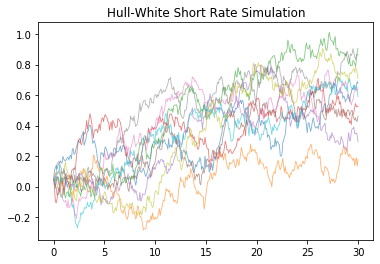

In [38]:
for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
plt.title("Hull-White Short Rate Simulation")
plt.show()

Short rate distribution

Expectation(r_t | F_s) = r_s * e^ (-a *(t -s )) + alpha(t) - alpha(s) * e^(-a * (t-s))

Variance(r_t | F_s) = sigma^2 / (2 * a) * (1 - e^(-2a * (t-s)))

alpha(t) = f(0, t) + sigma^2 / (2 * a^2) * (1 - e^(-a*t))^2


In [39]:
num_paths = 1000
time, paths = generate_paths(num_paths, timestep)

Comparing simulation(red dotted line) and theory(blue line)

Text(0.5, 1.0, 'Variance of Short Rates')

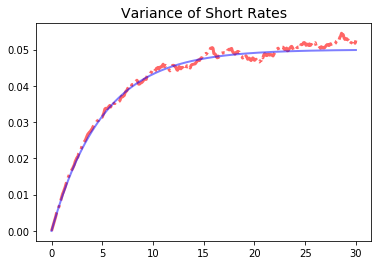

In [40]:
vol = [np.var(paths[:, i]) for i in range(timestep + 1)]
plt.plot(time, vol, "r-.", lw=3, alpha=0.6)
plt.plot(time, sigma*sigma/(2 * a) * (1.0 - np.exp(-2.0 * a * np.array(time))), "b-", lw=2, alpha=0.5)
plt.title("Variance of Short Rates", size=14)

Text(0.5, 1.0, 'Mean of Short Rates')

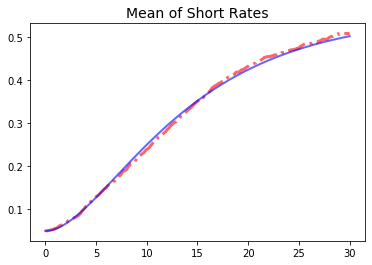

In [42]:
def alpha(forward, sigma, a, t):
    return forward + 0.5 * np.power(sigma / a * (1.0 - np.exp(-a * t)), 2)

avg = [np.mean(paths[:, i]) for i in range(timestep + 1)]
plt.plot(time, avg, "r-.", lw=3, alpha=0.6)
plt.plot(time, alpha(forward_rate, sigma, a, time), "b-", lw=2, alpha=0.6)
plt.title("Mean of Short Rates", size=14)